In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 5  # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # carma_variance computes the autcovariance function

Text(0,0.5,'magnitud')

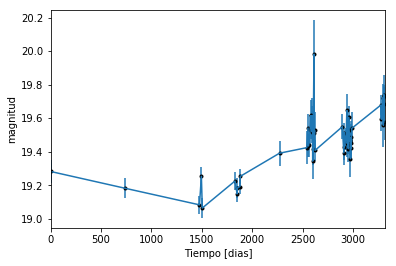

In [2]:
data = np.genfromtxt('LC_Z_141827.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

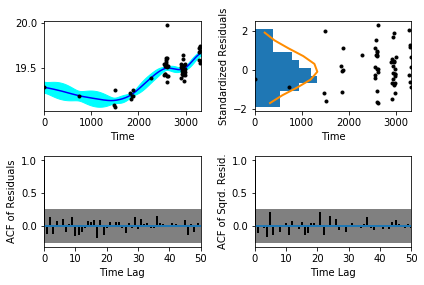

In [5]:
sample.assess_fit()

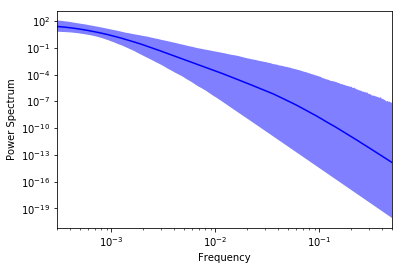

In [8]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [9]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.573591,'Nivel de ruido')

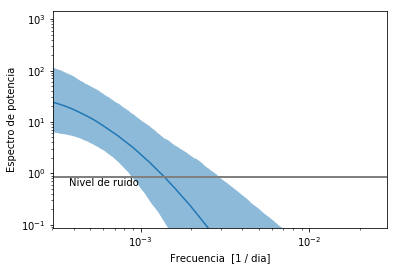

In [10]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

In [11]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [12]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [13]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 319.152583276
Median: 0.0
Standard deviation: 0.21004904515
68% credibility interval: [ 0.          0.18365396]
95% credibility interval: [ 0.         0.8162368]
99% credibility interval: [ 0.         0.9661418]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 319.152583276
Median: 0.0
Standard deviation: 0.21004904515
68% credibility interval: [ 0.          0.18365396]
95% credibility interval: [ 0.         0.8162368]
99% credibility interval: [ 0.         0.9661418]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1860.38549066
Median: 0.0
Standard deviation: 0.000224908732075
68% credibility interval: [ 0.  0.]
95% 

Plotting parameter summary


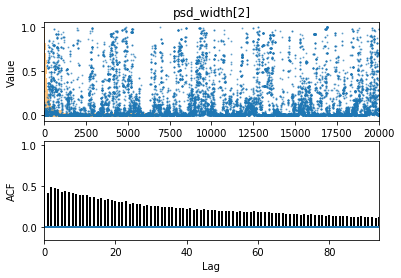

In [14]:
sample.plot_parameter('psd_width', 2, doShow=True)

In [15]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1323.30034314
Median: 78.1406289797
Standard deviation: 1.73917247287
68% credibility interval: [ 76.10299912  79.37403877]
95% credibility interval: [ 73.45641418  80.03110846]
99% credibility interval: [ 71.4310673   80.24671152]


In [17]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 367.793268375
Median: 0.670714321692
Standard deviation: 1.99337815694
68% credibility interval: [ 0.04931744  3.86746313]
95% credibility interval: [ 0.01242843  6.4467848 ]
99% credibility interval: [ 0.0092874   8.24451041]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 489.133687888
Median: 0.134750080509
Standard deviation: 6.82628779264
68% credibility interval: [ 0.00531422  3.69273026]
95% credibility interval: [  2.85583654e-0

In [19]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 18010.7260164
Median: 5.95169781616e-33
Standard deviation: 2.77647654437e+58
68% credibility interval: [  5.87838993e-52   2.27650121e-11]
95% credibility interval: [  4.32948225e-87   2.49237987e-01]
99% credibility interval: [  1.42129440e-93   1.39880728e+03]


In [21]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [22]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2292.50003342
Median: 19.356860899
Standard deviation: 0.12114506953
68% credibility interval: [ 19.25889945  19.4742668 ]
95% credibility interval: [ 19.11728983  19.60210927]
99% credibility interval: [ 18.96921315  19.72231365]


In [23]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [24]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 319.152583276
Median: 0.0
Standard deviation: 0.21004904515
68% credibility interval: [ 0.          0.18365396]
95% credibility interval: [ 0.         0.8162368]
99% credibility interval: [ 0.         0.9661418]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 319.152583276
Median: 0.0
Standard deviation: 0.21004904515
68% credibility interval: [ 0.          0.18365396]
95% credibility interval: [ 0.         0.8162368]
99% credibility interval: [ 0.         0.9661418]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1860.38549066
Median: 0.0
Standard deviation: 0.000224908732075
68% credibility interval: [ 0.  0.]
95% 

In [25]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [26]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1323.30034314
Median: 78.1406289797
Standard deviation: 1.73917247287
68% credibility interval: [ 76.10299912  79.37403877]
95% credibility interval: [ 73.45641418  80.03110846]
99% credibility interval: [ 71.4310673   80.24671152]


In [27]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [28]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 341.567194337
Median: 0.00720367725419
Standard deviation: 0.19802485417
68% credibility interval: [ 0.00055823  0.17424687]
95% credibility interval: [  3.24213407e-04   7.60332644e-01]
99% credibility interval: [  3.06208054e-04   9.49968208e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 508.983405499
Median: 0.000594220715612
Standard deviation: 0.0533209017931
68% credibility interval: [ 0.00034655  0.00553329]
95% credibility interval: [ 0.00030651  0.13232675]
99% credibility interval: [  3.02391735e-04   4.01995142e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1064.59001662
Median: 0.0227173098138
Standard

In [29]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [30]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1221.93270891
Median: 0.0393786285785
Standard deviation: 0.0509803521212
68% credibility interval: [ 0.02164763  0.07813032]
95% credibility interval: [ 0.01321869  0.17425569]
99% credibility interval: [ 0.01005089  0.3424213 ]


In [31]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1372.80685607
Median: 0.99075909779
Standard deviation: 0.148158202291
68% credibility interval: [ 0.85732094  1.14850561]
95% credibility interval: [ 0.75166335  1.33064052]
99% credibility interval: [ 0.69519439  1.46354855]


In [33]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [34]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 986.707773751
Median: 1.38629811926e-05
Standard deviation: 0.0401295285227
68% credibility interval: [  3.07324887e-07   5.70285266e-04]
95% credibility interval: [  9.01055662e-09   1.25747176e-02]
99% credibility interval: [  9.74777568e-10   2.29765749e-01]


In [35]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [37]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 341.567194337
Median: (-0.0452620390812+0j)
Standard deviation: 1.81381145393
68% credibility interval: [-1.09482539+0.j        -0.00350748-0.0834562j]
95% credibility interval: [ -4.77731090e+00+0.j          -2.03709291e-03-0.00046182j]
99% credibility interval: [ -5.96882629e+00+0.j          -1.92396194e-03-0.00200529j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 508.983405499
Median: (-0.00373359886956+0j)
Standard deviation: 1.36163627592
68% credibility interval: [-0.03476670+0.j -0.00217742+0.j]
95% credibility interval: [-0.83143348+1.405379j   -0.00192589+0.00161201j]
99% credibility interval: [ -2.52580997e+00+3.90544109j  -1.89998331e-03+0.j        ]
Posterior summary for parameter ar_roots  element 2
---

Plotting 2d PDF w KDE


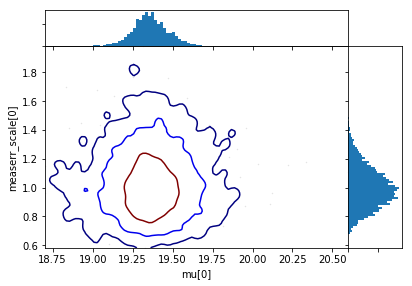

In [38]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


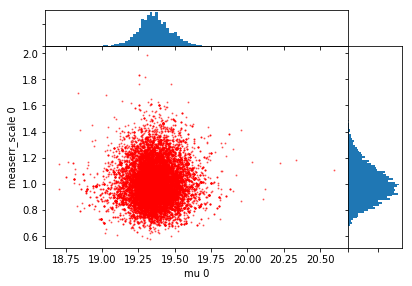

In [39]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


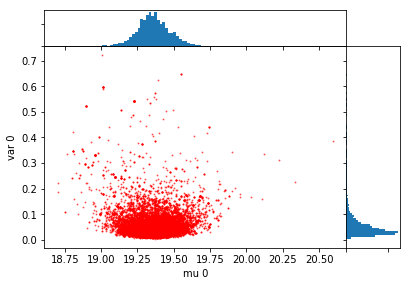

In [40]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


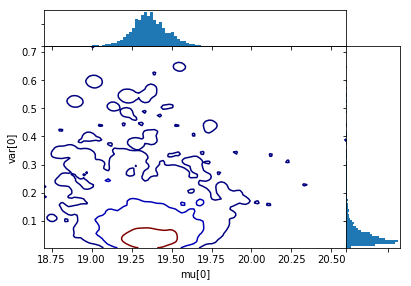

In [41]:
sample.plot_2dkde('mu', 'var', doShow=True)

Text(0.5,1,'Interpolacion, camino simulado')

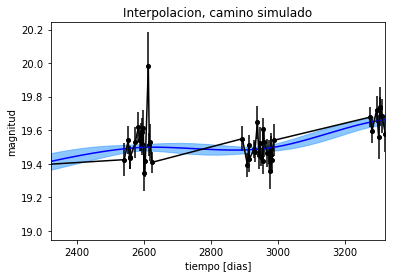

In [42]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

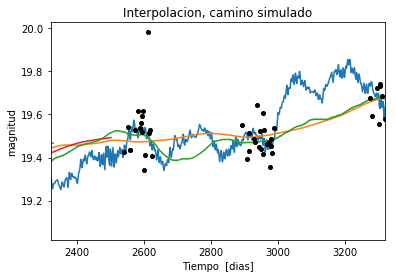

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')